In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')


## Read the data

In [2]:
users_data = pd.read_pickle("../data/users_data_cleaned.pkl")

In [3]:
# preview the data

users_data.head()

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


In [4]:
# check shape of data

users_data.shape

(45179, 33)

In [5]:
# check the structure of the data - make sure all the columns are float, into and bool (apart from user_id)

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

## Cluster the users based on demographic data only

In [6]:
# reset index

users_data.reset_index(drop = True, inplace = True)

In [7]:
users_data_demographics = users_data.filter(regex = 'education|job|age|single')
users_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [8]:
# filter columns that contain eduation, job, age and marital status

users_data_demographics = users_data.filter(regex = 'education|job|age|single')
users_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [9]:
users_data_demographics.describe()

# all variables have the same scale instead of age - need to scale the data

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


### k-Means Clustering Model


### Scale the data

In [10]:
users_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [14]:
scaler = StandardScaler()

scaler.fit(users_data_demographics)

users_demographic_data_scaled = scaler.transform(users_data_demographics)

print('New std deviation:', users_demographic_data_scaled.std())
print('New mean:', round(users_demographic_data_scaled.mean()))

New std deviation: 1.0
New mean: 0


## Fitting the data based on an arbitrary number of clusters

In [15]:
# specify the number clusters

n_clusters = 5

In [16]:
# fit the scaled data

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm on scaled data
kmeans.fit(users_demographic_data_scaled)


KMeans(n_clusters=5)

## Predicting the clusters for the users

In [17]:
# Predict the clusters

y_kmeans = kmeans.predict(users_demographic_data_scaled)

print(y_kmeans)

# The first user_id has been predicted as belonging to cluster 2, the second as 1..

[3 0 2 ... 2 2 2]


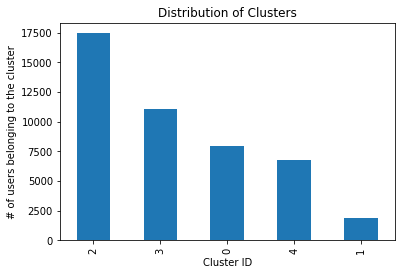

In [18]:
# Distribution of the clusters

pd.DataFrame(Counter(y_kmeans).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

## Identify optimal number of clusters

## Option 1: Elbow Method

In [23]:
# identify optimal number of clusters

def optimal_number_clusters(df):
    """
    Calculates optimal number of clusted based on Elbow Method
    
    parameters df
    """
    
    Sum_of_squared_distances = []
    K = range(2, 30) # define the range of clusters we would like to cluster the data into

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20,10))

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.xticks(K)
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show();

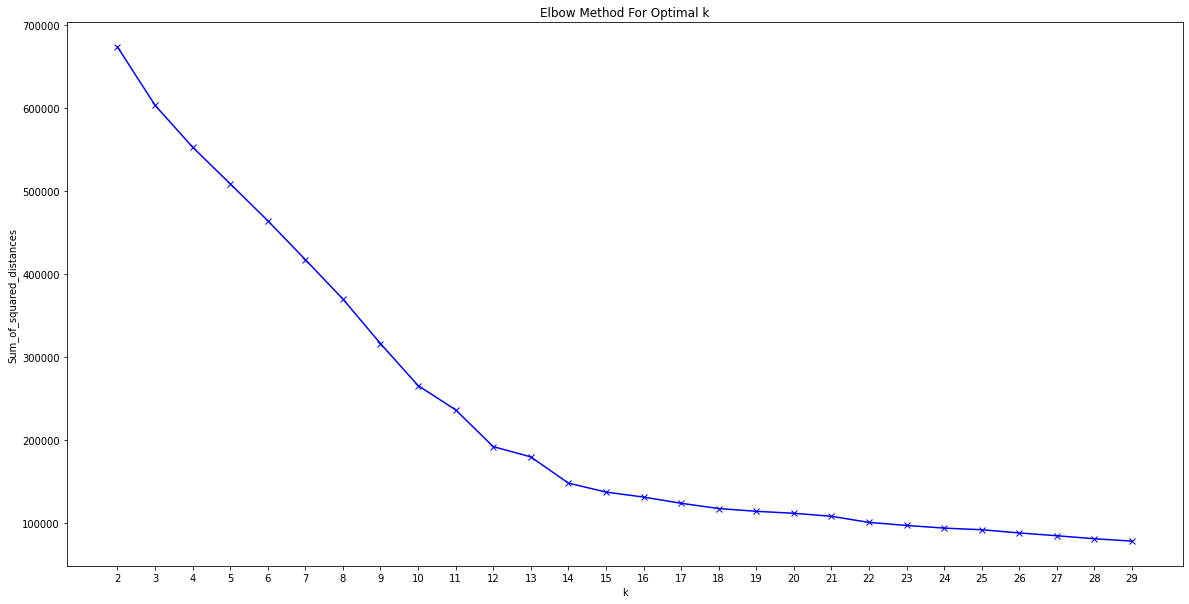

In [24]:
optimal_number_clusters(users_demographic_data_scaled)

# The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data. Can also be identified as an "elbow" 
# let's say the optimal number of clusters is 12

## Option 2: Silhouette Method

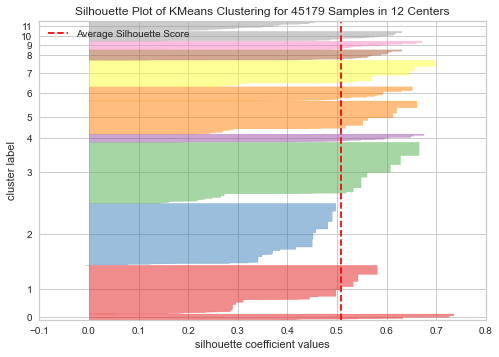

In [25]:
# Feel free to add existing code, otherwise let me know

from yellowbrick.cluster import SilhouetteVisualizer

silh = SilhouetteVisualizer(KMeans(12, random_state = 10))
silh.fit(users_data_scaled)
silh.poof();

In [26]:
print("# of clusters:", silh.n_clusters_)
print("# of clusters:", silh.silhouette_score_)


# of clusters: 12
# of clusters: 0.5083520849169678


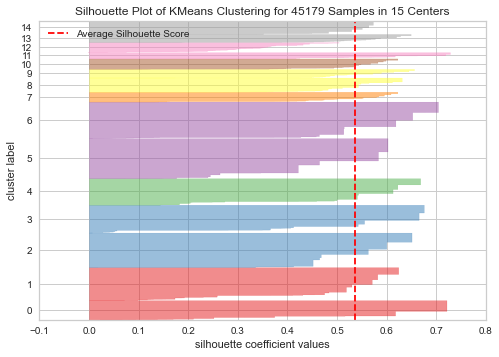

In [27]:
silh = SilhouetteVisualizer(KMeans(15, random_state = 10))
silh.fit(users_data_scaled)
silh.poof();

In [28]:
print("# of clusters:", silh.n_clusters_)
print("# of clusters:", silh.silhouette_score_)


# of clusters: 15
# of clusters: 0.5366978101336899


## Clustering the users based on the optimal number of clusters

In [29]:
n_clusters = 12 # optimal number of clusters

# fit the scaled data

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm on scaled data
kmeans.fit(users_data_scaled)

KMeans(n_clusters=12)

In [30]:
# Predict the clusters

y_kmeans = kmeans.predict(users_demographic_data_scaled)

print(y_kmeans)

# The first user_id has been predicted as belonging to cluster 2, the second as 1..

[2 5 7 ... 6 3 7]


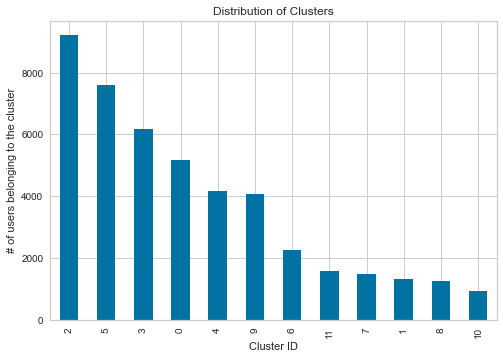

In [31]:
# Distribution of the clusters

pd.DataFrame(Counter(y_kmeans).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

## Evaluating the clusters

In [32]:
# concat the predicted clusters to original data set

y_kmeans_df = pd.DataFrame(y_kmeans).rename(columns = {0: "cluster_id"}) # convert to df

users_w_clusters = pd.concat([users_data, y_kmeans_df], axis = 1) # concat with original data set

users_w_clusters.head(n = 3)

# cluster_id is the last column 

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined,cluster_id
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,1,-1,0,False,0,0,0,4,8,2
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,1,-1,0,False,1,0,1,2,7,5
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,1,-1,0,False,0,0,0,1,6,7


In [34]:
# Cluster 1

users_w_clusters[users_w_clusters.cluster_id == 1].describe()

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,cluster_id
count,1301.000000,1301.000000,1301.0,1301.0,1301.0,1301.0,1301.0,1301.0,1301.0,1301.0,...,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.0
mean,2.957725,1537.449577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,287.397387,2.432744,34.200615,0.467333,0.267487,0.121445,0.308224,2.166026,6.454266,1.0
std,3.601140,2924.518843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,286.218732,2.634879,94.494382,1.538196,0.442818,0.326769,0.461937,1.025872,3.500388,0.0
min,0.000000,-1270.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2.000000,219.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.0
50%,2.000000,1047.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,1.0
75%,3.000000,1369.420000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.000000,3.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,10.000000,1.0
max,20.000000,44134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3025.000000,35.000000,871.000000,17.000000,1.000000,1.000000,1.000000,5.000000,12.000000,1.0


### Visualize the users with predicted clusters

In [35]:
 def visualize(y_kmeans, data_scaled, n_clusters):
        """
        Visualize the users with predicted clusters.
        
        Run PCA on the transposed data and reduce the dimnensions in pca_num_components dimensions
        
        """
        
        reduced_data = PCA(n_components = 2).fit_transform(data_scaled)
        results = pd.DataFrame(reduced_data, columns = ['pca1','pca2'])
        results = pd.concat([results, pd.DataFrame(y_kmeans)], axis = 1).rename(columns={0 : "cluster"})

        cmap = sns.color_palette("Set1", n_colors = n_clusters, desat = .5)

        sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = results, palette = cmap, legend = False)
        plt.title('K-means Clustering with 2 dimensions')
        plt.show();
        

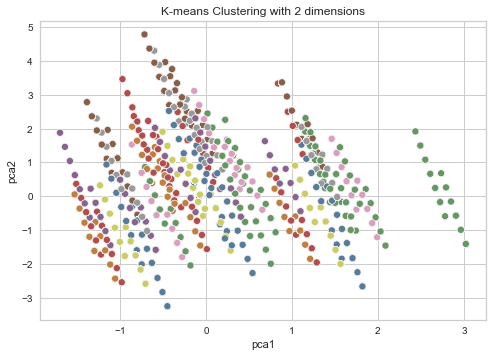

In [36]:
visualize(y_kmeans, users_demographic_data_scaled, n_clusters)